Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Maryna Kshanovska | 12048740 | 29.04.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 &ndash; The Vanishing Gradient Problem (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Brandstetter, A. Schörgenhumer<br>
<b>Date:</b> 22-03-2022

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u2_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u2_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> Set the random seed with <code>u2.set_seed(23)</code> to enable reproducible results in all tasks that incorporate randomness (e.g., t-SNE, splitting data intro train and test sets, initializing weights of a neural network, running the model optimization with random batches, etc.). You must use <code>23</code> as seed.
</div>

In [2]:
# Import pre-defined utilities specific to this notebook.
import u2_utils as u2

# Import additional utilities needed in this notebook.
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from typing import Dict, Sequence

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u2.setup_jupyter()

# Check minimum versions.
u2.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.20.2 (✓)
Installed pandas version: 1.2.4 (✓)
Installed PyTorch version: 1.8.1 (✓)
Installed scikit-learn version: 0.24.1 (✓)
Installed scipy version: 1.6.2 (✓)
Installed matplotlib version: 3.4.1 (✓)
Installed seaborn version: 0.11.1 (✓)
Installed PIL version: 8.2.0 (✓)


<h2>Definition of Auxiliaries</h2>

In this exercise, you will be working with a data set composed of images of various handwritten digits. It is probably <i>the</i> most prominent data set in the domain of machine learning: the <i>MNIST</i> data set. The data set distinguishes <i>ten</i> different classes, one for each digit (<i>zero</i> to <i>nine</i>). For curious minds, more information regarding this data set can be found at:

<center>
    <cite>LeCun, Y., 1998. The MNIST database of handwritten digits. <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a>.</cite>
</center><br>
    
Before analyzing and tackling the vanishing gradient problem, the data sets needs to be inspected.

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Load the <i>MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Split the data set into a training set and a test set in a ratio of $6:1$.</li>
        <li>Visualize the MNIST training set in tabular form.</li>
    </ul>
</div>

In [4]:
data_mnist = u2.load_mnist()

# Split the MNIST data set into training as well as test set and print their respective size.
data_mnist_train, data_mnist_test = u2.split_data(data_mnist, test_size=1.0 / 7.0)


data_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<div class="alert alert-warning">
    <b>Exercise 1.2. [3 Points]</b><br>
    Determine the following questions programmatically:
    <ul>
        <li>How many samples does the data set contain?</li>
        <li>How many samples does the training and the test set contain?</li>
        <li>How many features does the data set consist of (not counting the class label column <i>digit</i>)?</li>
    </ul>
</div>

In [5]:
print(f'Full data set contains: {data_mnist.shape[0]:>7} samples')
print(f'Training subset contains: {data_mnist_train.shape[0]:>5} samples')
print(f'Testing subset contains: {data_mnist_test.shape[0]:>6} samples')
print(f'Data set consists of: {data_mnist.shape[1]-1:>7}   features')

Full data set contains:   70000 samples
Training subset contains: 60000 samples
Testing subset contains:  10000 samples
Data set consists of:     784   features


<div class="alert alert-warning">
    <b>Exercise 1.3. [7 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the MNIST training set using <i>t-SNE</i>. To avoid long computation times, select a subset of the training data with $n=5000$ samples, and then perform <i>PCA</i> with $50$ components first. Afterwards, apply t-SNE with $2$ components on this PCA data (choose the perplexity yourself).</li>
        <li>Visualize the t-SNE downprojection.</li>
    </ul>
</div>

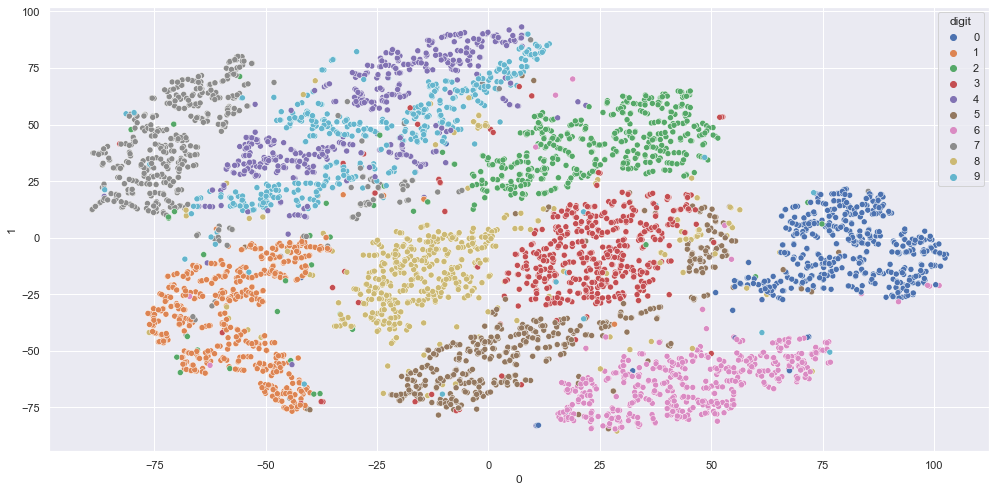

In [6]:
u2.set_seed(23)

data_mnist_train_5000 = data_mnist_train.sample(5000)
#print(data_mnist['digit'])
data_mnist_n = data_mnist_train_5000['digit']
data_mnist_train_pca = u2.apply_pca(n_components=50, data=data_mnist_train_5000)
data_mnist_train_tsne = u2.apply_tsne(n_components=2, data=data_mnist_train_5000, perplexity=12)
u2.plot_points_2d(data=data_mnist_train_tsne, targets=data_mnist_n, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.4. [2 Points]</b>
    <ul>
        <li>Comment on the separability of the MNIST training (sub)set with respect to the downprojection.</li>
    </ul>
</div>

We can see that each cluster is pretty well separated and we can  clearly observe them separately.

<h2>Training of a Neural Network</h2>

Loading and inspecting a new data set is always an exciting moment, but even more exciting is the implementation of a corresponding neural network and applying it to said data set. In this section, you will thus have to implement and train an appropriate neural network model and revisit your knowledge about the <i>forward</i> as well as the <i>backward</i> pass.

<div class="alert alert-warning">
    <b>Important:</b> The following code snippet is taken from the accompanying exercise notebook. Do not modify this code here.
</div>

In [7]:
def train_and_evaluate(model: torch.nn.Module, optimizer: torch.optim.Optimizer,
                       device: torch.device, num_epochs: int,
                       loader_train: torch.utils.data.DataLoader,
                       loader_test: torch.utils.data.DataLoader) -> None:
  
    for epoch in range(num_epochs):
        # Train model instance for one epoch.
        u2.train_network(
            model=model,
            data_loader=loader_train,
            device=device,
            optimizer=optimizer
        )

        # Evaluate current model instance.
        performance = u2.test_network(
            model=model,
            data_loader=loader_train,
            device=device
        )

        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
              f'/ Train loss: {performance[0]:.4f} / Train accuracy: {performance[1]:.4f}')

    # Evaluate final model on test data set.
    performance = u2.test_network(model=model, data_loader=loader_test, device=device)
    print(f'\nTest loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

<div class="alert alert-warning">
    <b>Exercise 2.1. [5 Points]</b>
    <ul>
        <li>Create a corresponding <tt>TensorDataset</tt> for the training as well as the test set.</li>
        <li>Wrap the previously defined <tt>TensorDataset</tt> instances in separate <tt>DataLoader</tt> instances with a batch size of $64$ (shuffle the training data set).</li>
        <li>Scale the features of the training as well as test set by a factor of $1\,/\,255$, i.e., normalize the data to range $[0; 1]$</li>
    </ul>
</div>

In [8]:
# Create data loader for iterating the MNIST training data set.
loader_mnist_train = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_mnist_train.drop(columns=['digit']).values / 255),  # normalize to range [0; 1]
        torch.from_numpy(data_mnist_train['digit'].values)
    ),
    batch_size=64,
    shuffle=True
)

# Create data loader for iterating the MNIST test data set.
loader_mnist_test = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_mnist_test.drop(columns=['digit']).values / 255),  # normalize to range [0; 1]
        torch.from_numpy(data_mnist_test['digit'].values)
    ),
    batch_size=64,
    shuffle=False
)

<div class="alert alert-warning">
    <b>Exercise 2.2. [10 Points]</b>
    <ul>
        <li>Implement a class <code>FNN_0</code> with the following architecture (square weight matrix means that the input size is equal to the output size):</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>input size = $28\times{}28 = 784$</td>
        </tr>
        <tr>
            <td>1</td>
            <td>fully connected</td>
            <td>$14\times{}14 = 196$ output features</td>
        </tr>
        <tr>
            <td>2</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>4</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>5</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>6</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>7</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>8</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>9</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>10</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>11</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>12</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>13</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
    </table>
</div>

In [9]:
class FNN_0(torch.nn.Module):
    """
    Logistic regression tailored to process Fashion-MNIST data.
    """
    
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 14 * 14)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(self.fc1.out_features, self.fc1.out_features)
        self.ac2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(self.fc2.out_features, self.fc2.out_features)
        self.ac3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(self.fc3.out_features, self.fc3.out_features)
        self.ac4 = torch.nn.Sigmoid()
        self.fc5 = torch.nn.Linear(self.fc4.out_features, self.fc4.out_features)
        self.ac5 = torch.nn.Sigmoid()
        self.fc6 = torch.nn.Linear(self.fc5.out_features, self.fc5.out_features)
        self.ac6 = torch.nn.Sigmoid()
        self.fc7 = torch.nn.Linear(self.fc6.out_features, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        x = self.fc6(x)
        x = self.ac6(x)
        
        return self.fc7(x)

<div class="alert alert-warning">
    <b>Important:</b> Use <code>target_device</code> as the main device to run your calculations on in the following code snippets. Do not modify this code here.
</div>

In [10]:
target_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

<div class="alert alert-warning">
    <b>Exercise 2.3. [3 Points]</b>
    <ul>
        <li>Create an instance of <code>FNN_0</code> as well as of a corresponding <code>SGD</code> optimizer with a learning rate of $0.02$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
    </ul>
</div>

In [11]:
# Set random seed for reproducibility.
u2.set_seed(23)

# Create LogisticRegression instance and the corresponding optimizer to use.
logistic_regression_model_0H = FNN_0().to(target_device)
optimizer = torch.optim.SGD(logistic_regression_model_0H.parameters(), lr=2e-2)

# Show the architecture of the logistic regression model.
print(logistic_regression_model_0H)

FNN_0(
  (fc1): Linear(in_features=784, out_features=196, bias=True)
  (ac1): Sigmoid()
  (fc2): Linear(in_features=196, out_features=196, bias=True)
  (ac2): Sigmoid()
  (fc3): Linear(in_features=196, out_features=196, bias=True)
  (ac3): Sigmoid()
  (fc4): Linear(in_features=196, out_features=196, bias=True)
  (ac4): Sigmoid()
  (fc5): Linear(in_features=196, out_features=196, bias=True)
  (ac5): Sigmoid()
  (fc6): Linear(in_features=196, out_features=196, bias=True)
  (ac6): Sigmoid()
  (fc7): Linear(in_features=196, out_features=10, bias=True)
)


<div class="alert alert-warning">
    <b>Exercise 2.4. [3 Points]</b>
    <ul>
        <li>Train an <code>FNN_0</code> network for $7$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [12]:
# Set random seed for reproducibility.
u2.set_seed(23)

# Train and evaluate LogisticRegression instance on the MNIST training set.
train_and_evaluate(
    model=logistic_regression_model_0H,
    optimizer=optimizer,
    device=target_device,
    num_epochs=7,
    loader_train=loader_mnist_train,
    loader_test=loader_mnist_test
)

Epoch: 1 / Train loss: 0.0361 / Train accuracy: 0.0993
Epoch: 2 / Train loss: 0.0361 / Train accuracy: 0.0984
Epoch: 3 / Train loss: 0.0361 / Train accuracy: 0.1023
Epoch: 4 / Train loss: 0.0360 / Train accuracy: 0.1113
Epoch: 5 / Train loss: 0.0361 / Train accuracy: 0.0971
Epoch: 6 / Train loss: 0.0360 / Train accuracy: 0.1023
Epoch: 7 / Train loss: 0.0360 / Train accuracy: 0.1023

Test loss: 0.0362 / Test accuracy: 0.1001


<div class="alert alert-warning">
    <b>Exercise 2.5. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

With this number of layers the accuracy is pretty high.

<div class="alert alert-warning">
    <b>Exercise 2.6. [2 Points]</b>
    <ul>
        <li>Write down a formula for the corresponding <i>forward</i> pass of <code>FNN_0</code>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

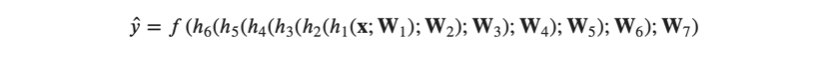

Where x is the input layer and y is output layer.

<div class="alert alert-warning">
    <b>Exercise 2.7. [3 Points]</b>
    <ul>
        <li>Write down a formula for the corresponding <i>backward</i> pass of <code>FNN_0</code>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

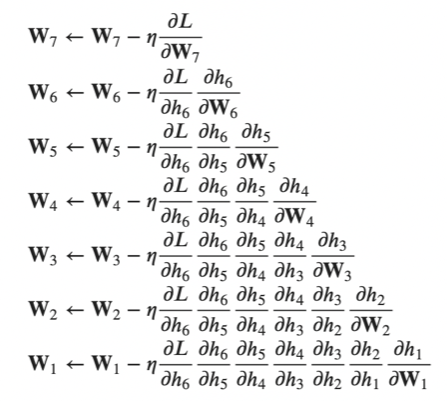

<h2>Analyzing Gradients</h2>

Is the performance problem of <code>FNN_0</code> related to the vanishing gradient problem? This is exactly the point you're going to figure out in this exercise. As a first step, the gradients of a freshly initialized model need to be collected and analyzed. Afterwards, in case of a vanishing gradient problem, countermeasures must be taken.</p>

<div class="alert alert-warning">
    <b>Important:</b> The following code snippet is taken from the accompanying exercise notebook. Do not modify this code here.
</div>

In [13]:
def collect_gradients(model: torch.nn.Module, device: torch.device,
                      loader: torch.utils.data.DataLoader) -> Sequence[Dict[str, np.array]]:
    """
    Auxiliary function for collecting gradients of a corresponding model.
    
    :param model: model instance to be used for collecting gradients
    :param device: device to use for gradient collection
    :param loader: data loader supplying the samples used for collecting gradients
    :return: sequence of parameter names and gradients, averaged over all parameter elements
    """
    model_state = model.training
    model.train()
    model.zero_grad()
    
    # Iterating over the data set and computing the corresponding gradients.
    # Since we are only interested in the gradients, we can skip the optimization step.
    gradients = {}
    criterion = torch.nn.CrossEntropyLoss()
    
    for data, target in loader:
        data, target = data.float().to(device), target.long().to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
    
        # Collecting the (averaged absolute) gradients from the current model.
        for name, parameter in model.named_parameters():
            if "weight" in name and parameter.grad is not None:
                gradients.setdefault(name, []).append(parameter.grad.view(-1).abs().mean().item())
        model.zero_grad()
    
    # Reset model state and return collected gradients.
    model.train(mode=model_state)
    return gradients

<div class="alert alert-warning">
    <b>Exercise 3.1. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_0</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [14]:
# Create an instance.
fresh_logistic_regression_model_0H = FNN_0().to(target_device)

collected_gradients = collect_gradients(fresh_logistic_regression_model_0H, target_device, loader_mnist_train)

gradients = [fresh_logistic_regression_model_0H, collected_gradients]

In [16]:
models = []
for num_hidden_layers in range(1):
    
    # Set random seed for reproducibility.
    np.random.seed(seed=42)
    torch.manual_seed(seed=42)
    
    # Dynamically create logistic regression models from global namespace.
    models.append(globals()[f'FNN_{num_hidden_layers}']())
    models[-1] = models[-1].to(target_device)

<div class="alert alert-warning">
    <b>Exercise 3.2. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly.</li>
    </ul>
</div>

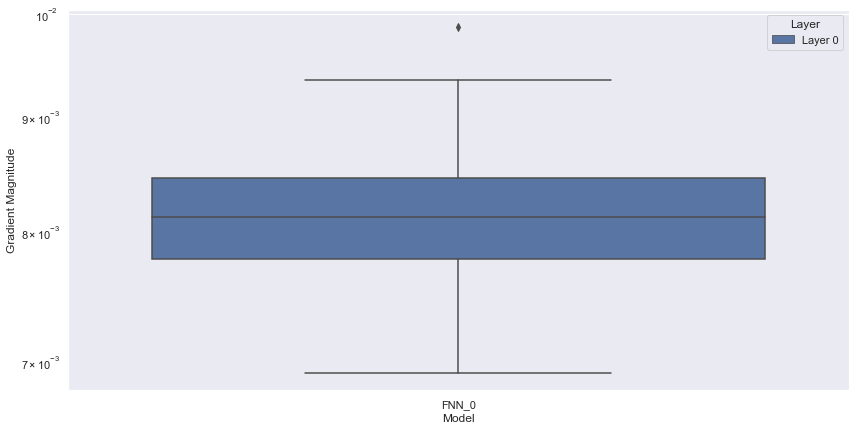

In [18]:
gradients = [collect_gradients(
    model=model, device=target_device, loader=loader_mnist_train
)  for model in models]

# Set default plotting style.
sns.set()

# Prepare collected gradients for plotting.
gradients_prepared = []
for model, gradient in zip(models, gradients):
    gradient_data = pd.DataFrame([
        v for k, v in sorted(gradient.items(), key=lambda _: _[0]) if r'weight' in k
    ]).transpose().rename(columns=lambda _: f'Layer {_}')
    gradient_data = pd.melt(gradient_data, value_vars=gradient_data.columns)
    gradient_data[r'Model'] = type(model).__name__
    gradients_prepared.append(gradient_data)

# Combine all gradients in a single data frame.
gradients_prepared = pd.concat(gradients_prepared).rename(
    columns={r'variable': r'Layer', r'value': r'Gradient Magnitude'})

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.set(yscale=r'log')

# Plot pre-processed gradients.
_ = sns.boxplot(x=r'Model', y=r'Gradient Magnitude', hue=r'Layer', data=gradients_prepared, ax=ax)

<div class="alert alert-warning">
    <b>Exercise 3.3. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

your answer goes here

<div class="alert alert-warning">
    <b>Exercise 3.4. [10 Points]</b>
    <ul>
        <li>Assume a vanishing gradient. Apply the countermeasure presented during the accompanying exercise by implementing a corresponding <code>FNN_1</code> network.</li>
    </ul>
</div>

In [15]:
class FNN_1(torch.nn.Module):
    """
    Logistic regression tailored to process Fashion-MNIST data.
    """
    
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 14 * 14)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(self.fc1.out_features, self.fc1.out_features)
        self.ac2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(self.fc2.out_features, self.fc2.out_features)
        self.ac3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(self.fc3.out_features, self.fc3.out_features)
        self.ac4 = torch.nn.Sigmoid()
        self.fc5 = torch.nn.Linear(self.fc4.out_features, self.fc4.out_features)
        self.ac5 = torch.nn.Sigmoid()
        self.fc6 = torch.nn.Linear(self.fc5.out_features, self.fc5.out_features)
        self.ac6 = torch.nn.Sigmoid()
        self.fc7 = torch.nn.Linear(self.fc6.out_features, self.fc6.out_features)
        self.ac7 = torch.nn.Sigmoid()
        self.fc8 = torch.nn.Linear(self.fc7.out_features, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        x = self.fc6(x)
        x = self.ac6(x)
        x = self.ac7(x)
        
        return self.fc8(x)

<div class="alert alert-warning">
    <b>Exercise 3.5. [3 Points]</b>
    <ul>
        <li>Create an instance of <code>FNN_1</code> as well as of a corresponding <code>SGD</code> optimizer with a learning rate of $0.02$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
    </ul>
</div>

In [16]:
# Set random seed for reproducibility.
u2.set_seed(23)

# Create LogisticRegression instance and the corresponding optimizer to use.
logistic_regression_model_1H = FNN_1().to(target_device)
optimizer = torch.optim.SGD(logistic_regression_model_1H.parameters(), lr=2e-2)

# Show the architecture of the logistic regression model.
print(logistic_regression_model_1H)

FNN_1(
  (fc1): Linear(in_features=784, out_features=196, bias=True)
  (ac1): Sigmoid()
  (fc2): Linear(in_features=196, out_features=196, bias=True)
  (ac2): Sigmoid()
  (fc3): Linear(in_features=196, out_features=196, bias=True)
  (ac3): Sigmoid()
  (fc4): Linear(in_features=196, out_features=196, bias=True)
  (ac4): Sigmoid()
  (fc5): Linear(in_features=196, out_features=196, bias=True)
  (ac5): Sigmoid()
  (fc6): Linear(in_features=196, out_features=196, bias=True)
  (ac6): Sigmoid()
  (fc7): Linear(in_features=196, out_features=196, bias=True)
  (ac7): Sigmoid()
  (fc8): Linear(in_features=196, out_features=10, bias=True)
)


<div class="alert alert-warning">
    <b>Exercise 3.6. [3 Points]</b>
    <ul>
        <li>Train an <code>FNN_1</code> network for $7$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [17]:
# Set random seed for reproducibility.
u2.set_seed(23)

# Train and evaluate LogisticRegression instance on the MNIST training set.
train_and_evaluate(
    model=logistic_regression_model_1H,
    optimizer=optimizer,
    device=target_device,
    num_epochs=7,
    loader_train=loader_mnist_train,
    loader_test=loader_mnist_test
)

Epoch: 1 / Train loss: 0.0362 / Train accuracy: 0.0993
Epoch: 2 / Train loss: 0.0361 / Train accuracy: 0.0984
Epoch: 3 / Train loss: 0.0361 / Train accuracy: 0.1023
Epoch: 4 / Train loss: 0.0360 / Train accuracy: 0.1113
Epoch: 5 / Train loss: 0.0361 / Train accuracy: 0.0993
Epoch: 6 / Train loss: 0.0361 / Train accuracy: 0.0971
Epoch: 7 / Train loss: 0.0361 / Train accuracy: 0.0971

Test loss: 0.0362 / Test accuracy: 0.1000


<div class="alert alert-warning">
    <b>Exercise 3.7. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

From the result we can observe that adding an additional layer does not improve the performance of our model.

<div class="alert alert-warning">
    <b>Exercise 3.8. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_1</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [18]:
# Create an instance.
fresh_logistic_regression_model_1H = FNN_1().to(target_device)

collected_gradients_1H = collect_gradients(fresh_logistic_regression_model_1H, target_device, loader_mnist_train)

gradients.append([fresh_logistic_regression_model_1H, collected_gradients_1H])

<div class="alert alert-warning">
    <b>Exercise 3.9. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly. Include the gradient visualization of <code>FNN_0</code> to enable a direct comparison.</li>
    </ul>
</div>

In [20]:
gradients = [collect_gradients(
    model=model, device=target_device, loader=loader_mnist_train
)  for model in models]

# Set default plotting style.
sns.set()

# Prepare collected gradients for plotting.
gradients_prepared = []
for model, gradient in zip(models, gradients):
    gradient_data = pd.DataFrame([
        v for k, v in sorted(gradient.items(), key=lambda _: _[0]) if r'weight' in k
    ]).transpose().rename(columns=lambda _: f'Layer {_}')
    gradient_data = pd.melt(gradient_data, value_vars=gradient_data.columns)
    gradient_data[r'Model'] = type(model).__name__
    gradients_prepared.append(gradient_data)

# Combine all gradients in a single data frame.
gradients_prepared = pd.concat(gradients_prepared).rename(
    columns={r'variable': r'Layer', r'value': r'Gradient Magnitude'})

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.set(yscale=r'log')

# Plot pre-processed gradients.
_ = sns.boxplot(x=r'Model', y=r'Gradient Magnitude', hue=r'Layer', data=gradients_prepared, ax=ax)

NameError: name 'models' is not defined

<div class="alert alert-warning">
    <b>Exercise 3.10. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

your answer goes here

<h2>Deriving Derivatives</h2>

It is already known from the lecture as well as the exercise that <i>activation</i> functions are the primary culprit of the <i>Vanishing Gradient Problem</i>. Hence, it is important to know <i>how</i> the chosen activation functions activate the input and consequently what the <i>derivative</i> is.

<div class="alert alert-warning">
    <b>Exercise 4.1. [4 Points]</b><br>
    Hint: Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardsigmoid.html#torch.nn.Hardsigmoid">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>hardsigmoid</code> activation function as it was done for <code>relu</code> in the exercise.</li>
        <li>Implement the <i>derivative</i> of the <code>hardsigmoid</code> activation function accordingly.</li>
    </ul>
</div>

In [21]:
def hardsigmoid(x: float) -> float:
    """
    Compute the logistic function.
    
    :param x: the input on which to apply the logistic function
    :return: the result of the logistic function applied to its input
    """
    return max(0.0, min(1.0, (x+3)/6))


def hardsigmoid_d(x: float) -> float:
    """
    Compute the derivate of the logistic function.
    
    :param x: the input to the logistic function for computing its derivative
    :return: the derivative of the logistic function with respect to its input
    """
    if x <= -3 or x >= 3:
        return 0.0
    else:
        return 1/6

<div class="alert alert-warning">
    <b>Exercise 4.2. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>hardsigmoid</code> activation function.</li>
        <li>Plot the <code>hardsigmoid</code> activation function indluding its derivative for the input range $[-7.5; 7.5]$.</li>
    </ul>
</div>

hardsigmoid(-10.0): 0.0000 | hardsigmoid'(-10.0): 0.0000
hardsigmoid( -3.0): 0.0000 | hardsigmoid'( -3.0): 0.0000
hardsigmoid(  0.0): 0.5000 | hardsigmoid'(  0.0): 0.1667
hardsigmoid(  3.0): 1.0000 | hardsigmoid'(  3.0): 0.0000
hardsigmoid( 10.0): 1.0000 | hardsigmoid'( 10.0): 0.0000


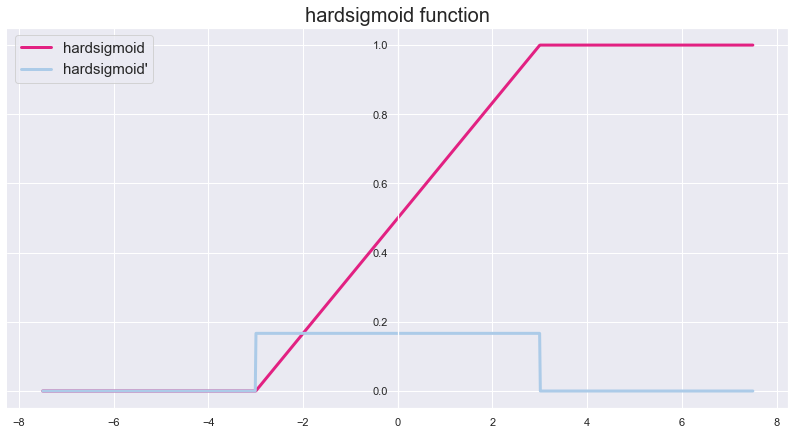

In [22]:
# Crudly check the value range of the sigmoid function and its derivative.
for x in [-10.0, -3.0, 0.0, 3.0, 10.0]:
    print(f'hardsigmoid({x:>5}): {hardsigmoid(x):.4f} | hardsigmoid\'({x:>5}): {hardsigmoid_d(x):.4f}') 
    
def plot_hardsigmoid_with_derivative(x_min: float = -7.5, x_max: float = 7.5, granularity: int = 1000) -> None:
    """
    Plot the rectified linear unit function including its derivative.
    
    :param x_min: minimum value of the input value range
    :param x_max: maximum value of the input value range
    :param granularity: granularity controlling the stepsize of the input value range
    """
    data = np.linspace(x_min, x_max, granularity)
    data_pivot_neg = np.where(data <= 0)
    data_pivot_pos = np.where(data > 0)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['left'].set_position('center')

    plt.plot(data, tuple(map(hardsigmoid, data)), color='#e22182', linewidth=3, label='hardsigmoid')
    # Plot derivative of negative/positive data separately to avoid a linked line plot.
    if len(data_pivot_neg) > 0:
        data_neg = data[data_pivot_neg]
        plt.plot(data_neg, tuple(map(hardsigmoid_d, data_neg)), color='#accbe8', linewidth=3, label="hardsigmoid'")
    if len(data_pivot_pos) > 0:
        data_pos = data[data_pivot_pos]
        plt.plot(data_pos, tuple(map(hardsigmoid_d, data_pos)), color='#accbe8', linewidth=3)
    plt.title('hardsigmoid function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

# Plot rectified linear unit function including its derivative.
plot_hardsigmoid_with_derivative()

<div class="alert alert-warning">
    <b>Exercise 4.3. [4 Points]</b><br>
    Hint: Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>leaky_relu</code> activation function as it was done for <code>relu</code> in the exercise. Use a <i>negative slope</i> of $0.3$.</li>
        <li>Implement the <i>derivative</i> of the <code>leaky_relu</code> activation function accordingly.</li>
    </ul>
</div>

In [23]:
def leaky_relu(x: float) -> float:
    """
    Compute the logistic function.
    
    :param x: the input on which to apply the logistic function
    :return: the result of the logistic function applied to its input
    """
    return max(0.0, x) + 0.3*min(0.0, x)


def leaky_relu_d(x: float) -> float:
    """
    Compute the derivate of the logistic function.
    
    :param x: the input to the logistic function for computing its derivative
    :return: the derivative of the logistic function with respect to its input
    """
    if x >= 0:
        return 1
    else:
        return 0.3

<div class="alert alert-warning">
    <b>Exercise 4.4. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>leaky_relu</code> activation function.</li>
        <li>Plot the <code>leaky_relu</code> activation function indluding its derivative for the input range $[-7.5; 7.5]$.</li>
    </ul>
</div>

leaky_relu(-10.0): -3.0000 | leaky_relu'(-10.0): 0.3000
leaky_relu( -3.0): -0.9000 | leaky_relu'( -3.0): 0.3000
leaky_relu(  0.0): 0.0000 | leaky_relu'(  0.0): 1.0000
leaky_relu(  3.0): 3.0000 | leaky_relu'(  3.0): 1.0000
leaky_relu( 10.0): 10.0000 | leaky_relu'( 10.0): 1.0000


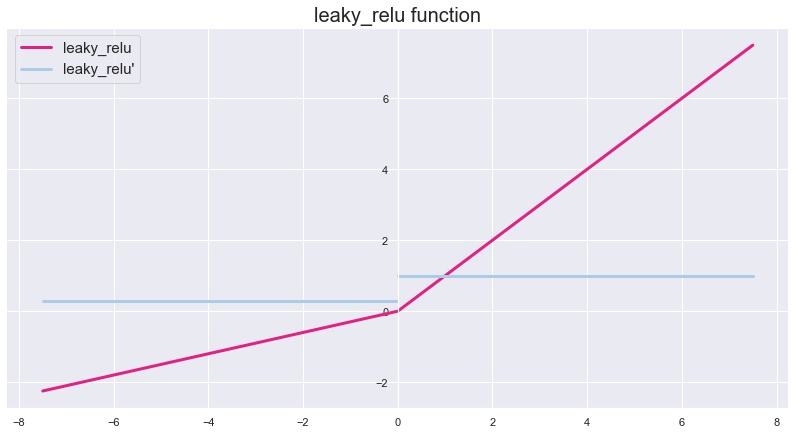

In [24]:
# Crudly check the value range of the sigmoid function and its derivative.
for x in [-10.0, -3.0, 0.0, 3.0, 10.0]:
    print(f'leaky_relu({x:>5}): {leaky_relu(x):.4f} | leaky_relu\'({x:>5}): {leaky_relu_d(x):.4f}') 
    
def plot_leaky_relu_with_derivative(x_min: float = -7.5, x_max: float = 7.5, granularity: int = 1000) -> None:
    """
    Plot the rectified linear unit function including its derivative.
    
    :param x_min: minimum value of the input value range
    :param x_max: maximum value of the input value range
    :param granularity: granularity controlling the stepsize of the input value range
    """
    data = np.linspace(x_min, x_max, granularity)
    data_pivot_neg = np.where(data <= 0)
    data_pivot_pos = np.where(data > 0)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['left'].set_position('center')

    plt.plot(data, tuple(map(leaky_relu, data)), color='#e22182', linewidth=3, label='leaky_relu')
    # Plot derivative of negative/positive data separately to avoid a linked line plot.
    if len(data_pivot_neg) > 0:
        data_neg = data[data_pivot_neg]
        plt.plot(data_neg, tuple(map(leaky_relu_d, data_neg)), color='#accbe8', linewidth=3, label="leaky_relu'")
    if len(data_pivot_pos) > 0:
        data_pos = data[data_pivot_pos]
        plt.plot(data_pos, tuple(map(leaky_relu_d, data_pos)), color='#accbe8', linewidth=3)
    plt.title('leaky_relu function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

# Plot rectified linear unit function including its derivative.
plot_leaky_relu_with_derivative()

<div class="alert alert-warning">
    <b>Exercise 4.5. [4 Points]</b><br>
    Hint: Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>tanh</code> (Hyperbolic Tangent) activation function as it was done for <code>relu</code> in the exercise.</li>
        <li>Implement the <i>derivative</i> of the <code>tanh</code> activation function accordingly.</li>
    </ul>
</div>

In [25]:
from math import exp

def tanh(x: float) -> float:
    """
    Compute the logistic function.
    
    :param x: the input on which to apply the logistic function
    :return: the result of the logistic function applied to its input
    """
    return (exp(x)-exp(-x))/(exp(x)+exp(-x))


def tanh_d(x: float) -> float:
    """
    Compute the derivate of the logistic function.
    
    :param x: the input to the logistic function for computing its derivative
    :return: the derivative of the logistic function with respect to its input
    """

    return 1 - tanh(x)*tanh(x)

<div class="alert alert-warning">
    <b>Exercise 4.6. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>tanh</code> activation function.</li>
        <li>Plot the <code>tanh</code> activation function indluding its derivative for the input range $[-7.5; 7.5]$.</li>
    </ul>
</div>

ltanh(-10.0): -1.0000 | tanh'(-10.0): 0.0000
ltanh( -3.0): -0.9951 | tanh'( -3.0): 0.0099
ltanh(  0.0): 0.0000 | tanh'(  0.0): 1.0000
ltanh(  3.0): 0.9951 | tanh'(  3.0): 0.0099
ltanh( 10.0): 1.0000 | tanh'( 10.0): 0.0000


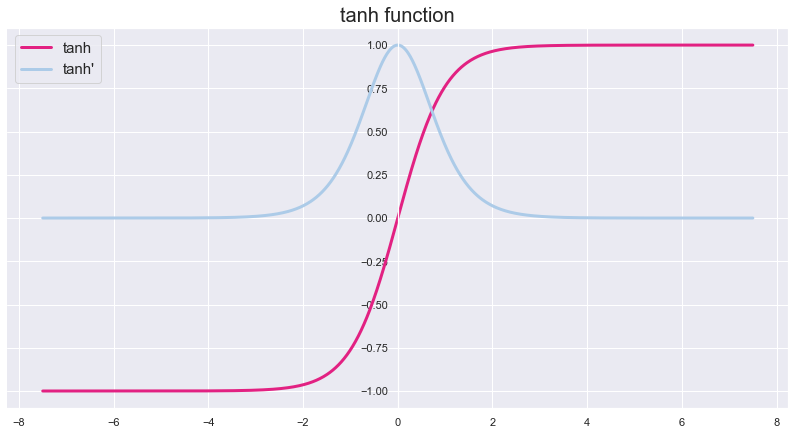

In [26]:
# Crudly check the value range of the tanh function and its derivative.
for x in [-10.0, -3.0, 0.0, 3.0, 10.0]:
    print(f'ltanh({x:>5}): {tanh(x):.4f} | tanh\'({x:>5}): {tanh_d(x):.4f}') 
    
def plot_tanh_with_derivative(x_min: float = -7.5, x_max: float = 7.5, granularity: int = 1000) -> None:
    """
    Plot the rectified linear unit function including its derivative.
    
    :param x_min: minimum value of the input value range
    :param x_max: maximum value of the input value range
    :param granularity: granularity controlling the stepsize of the input value range
    """
    data = np.linspace(x_min, x_max, granularity)
    data_pivot_neg = np.where(data <= 0)
    data_pivot_pos = np.where(data > 0)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['left'].set_position('center')

    plt.plot(data, tuple(map(tanh, data)), color='#e22182', linewidth=3, label='tanh')
    # Plot derivative of negative/positive data separately to avoid a linked line plot.
    if len(data_pivot_neg) > 0:
        data_neg = data[data_pivot_neg]
        plt.plot(data_neg, tuple(map(tanh_d, data_neg)), color='#accbe8', linewidth=3, label="tanh'")
    if len(data_pivot_pos) > 0:
        data_pos = data[data_pivot_pos]
        plt.plot(data_pos, tuple(map(tanh_d, data_pos)), color='#accbe8', linewidth=3)
    plt.title('tanh function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

# Plot rectified linear unit function including its derivative.
plot_tanh_with_derivative()

<div class="alert alert-warning">
    <b>Exercise 4.7. [2 Points]</b>
    <ul>
        <li>Which of these three activation functions from above do you think is susceptible to the vanishing gradient problem? Expain your decision.</li>
    </ul>
</div>

To my mind, sigmoid function are especially susceptible to the vanishing gradient problem.